In [9]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
from google.colab import files
uploaded  = files.upload() 
df = pd.read_csv("Campus Recruitment.csv")

Saving Campus Recruitment.csv to Campus Recruitment.csv


In [27]:
df.fillna(0)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [39]:
X = df[['sl_no','ssc_p','hsc_p','degree_p','etest_p','mba_p']]
Y = df['status']

X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=0.2)
print(X_train.head())

     sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p
146    147  62.00  63.00      66.0    85.00  55.14
206    207  41.00  42.00      60.0    97.00  53.39
170    171  63.40  67.20      60.0    58.06  69.28
80      81  69.00  62.00      69.0    67.00  62.35
155    156  51.57  74.66      59.9    56.15  65.99


In [40]:
print("Shape of train set",X_train.shape,Y_train.shape)
print("Shape of test set",X_test.shape,Y_test.shape)

Shape of train set (172, 6) (172,)
Shape of test set (43, 6) (43,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36781844e0>,
      dtype=object)

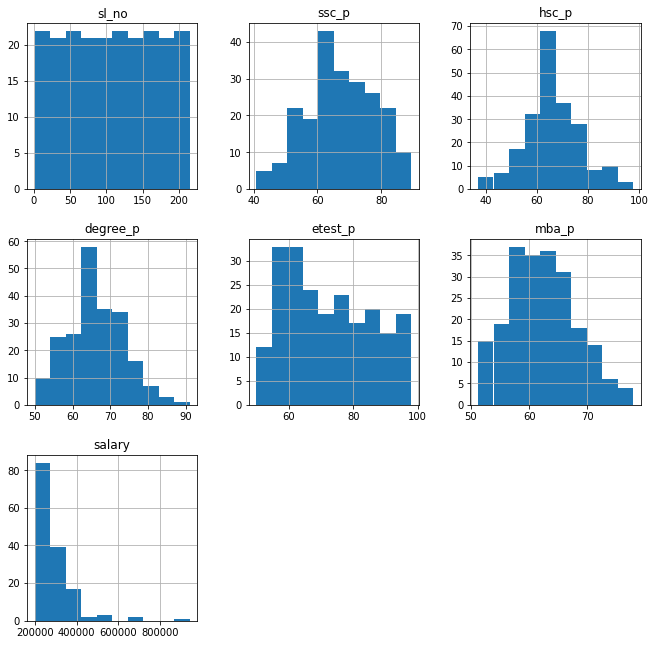

In [41]:
df.hist(figsize=[11,11])

In [36]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
accuracy_score(Y_test,knn.predict(X_test))

0.8372093023255814

In [43]:
X_train_scale=scale(X_train[['sl_no','ssc_p','hsc_p','degree_p','etest_p','mba_p']])
X_test_scale=scale(X_test[['sl_no','ssc_p','hsc_p','degree_p','etest_p','mba_p']])
# Fitting k-NN on our scaled data set
knn_after_std=KNeighborsClassifier(n_neighbors=5)
knn_after_std.fit(X_train[['sl_no','ssc_p','hsc_p','degree_p','etest_p','mba_p']],Y_train.values.ravel())
# Checking the performance of our model on the testing data set
print("\nAccuracy score on test set :", accuracy_score(Y_test,knn_after_std.predict(X_test_scale)))


Accuracy score on test set : 0.4418604651162791


In [45]:
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train[['sl_no','ssc_p','hsc_p','degree_p','etest_p','mba_p']])
X_test_minmax=min_max.fit_transform(X_test[['sl_no','ssc_p','hsc_p','degree_p','etest_p','mba_p']])
# Fitting k-NN on our scaled data set
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,knn.predict(X_test_minmax))

0.7906976744186046